In [60]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import os
import glob
from sklearn.preprocessing import MinMaxScaler

In [61]:
# load and save functions
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name , 'rb') as f:
        return pd.DataFrame(pickle.load(f))

df_current['information'].at[0] = class_  
df_current['information'].at[1] = subclass_  
df_current['information'].at[2] = z_  
df_current['information'].at[3] = z_err  
df_current['information'].at[4] = z_warn  
df_current['information'].at[5] = best_obj  
df_current['information'].at[6] = instrument  

In [80]:
# load all spectra in internal memory 
locationSpectra = 'spectra_matched_multiproc/'
filenames = glob.glob(locationSpectra+'*pkl')
"""
cutoff = 4000

X = np.zeros((4900,cut_off)) # len(filenames)
wavelength = np.zeros((4900,cut_off)) # len(filenames)
X_scaled = np.zeros((4900,cut_off,1)) #len(filenames)
y = []


counter_excluded = 0
for i in range(4900): #len(filenames)
    df_current = load_obj(filenames[i])
    l = len(df_current['flux'])
    X[i][0:min(l,cutoff)] = df_current['flux'][0:min(l,cutoff)]
    wavelength[i][0:min(l,cutoff)] = np.power(10,df_current['loglam'][0:min(l,cutoff)])
    
    # Scale result in new array
    X_scaled[i] = sc.fit_transform(X[i].reshape(cut_off,1))
    
    y.append(df_current['information'].iloc[0])
    
    # Resize to exclude zeros

    
X = X[0:(len(X)-counter_excluded)]
wavelength = wavelength[0:(len(X)-counter_excluded)]
y = np.array(y)
"""
X = [[] for x in range(4900)]
X_scaled = [[] for x in range(4900)]
sc = MinMaxScaler()
wavelength = [[] for x in range(4900)]
y = []
for i,filename in enumerate(filenames[0:4900]):
    df_current = load_obj(filename)
    if(df_current['information'].iloc[6] == 'BOSS'):
        l = len(df_current['model'])
        X[i].extend(df_current['model'][0:l])
        X[i] = np.array(X[i])

        X_scaled[i].extend(sc.fit_transform(X[i].reshape(l,1)))
        X_scaled[i] = np.array(X_scaled[i])

        wavelength[i].extend(np.power(10,df_current['loglam'][0:l]))
        wavelength[i] = np.array(wavelength[i])
        y.append(df_current['information'].iloc[0])

X = np.array(X)
X_scaled = np.array(X_scaled)
wavelength = np.array(wavelength)
y = np.array(y)

In [83]:
X

array([list([]), list([]),
       array([0.02939549, 0.03028728, 0.03107008, ..., 1.63392138, 1.63560283,
       1.6381762 ]),
       ..., list([]),
       array([0.96431571, 0.97670227, 0.9854297 , ..., 4.88257742, 4.89928961,
       4.91417313]),
       list([])], dtype=object)

'GALAXY'

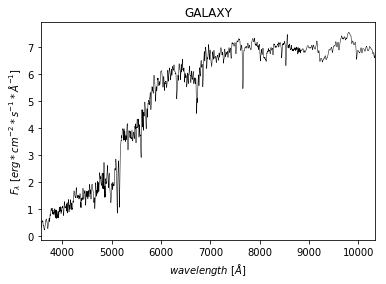

In [63]:
i = 100
plt.plot(wavelength[i],X[i],c='k',linewidth=0.5)
plt.xlim(min(wavelength[i]),max(wavelength[i]))
plt.xlabel(r'$wavelength$ '+r'$[\AA]$')
plt.ylabel(r'$F_\lambda$ '+r'$[erg*cm^{-2}*s^{-1}*\AA^{-1}]$')
plt.title(str(y[i]))
plt.savefig('spec_example_forPres.png')
y[i]

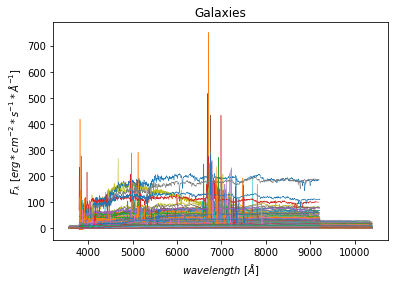

In [64]:
# plot galaxies
idx_galaxy = (y == 'GALAXY')
X_galaxy = X[idx_galaxy]
wavelength_galaxy = wavelength[idx_galaxy]

fig = plt.figure()
for i in range(len(X_galaxy)):
    try:
        plt.plot(wavelength_galaxy[i],X_galaxy[i],linewidth=0.5)
    except:
        pass
        
#plt.xlim(min(wavelength_galaxy),max(wavelength_galaxy))
plt.xlabel(r'$wavelength$ '+r'$[\AA]$')
plt.ylabel(r'$F_\lambda$ '+r'$[erg*cm^{-2}*s^{-1}*\AA^{-1}]$')
plt.title('Galaxies')
plt.savefig('spec_plots/galaxies_model_BOSS.png')
plt.show()

In [65]:
plt.close()

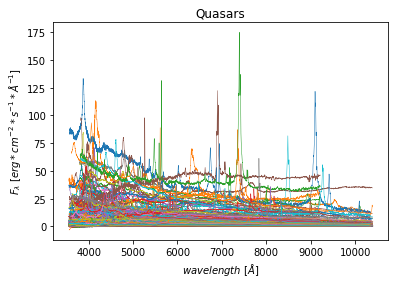

In [66]:
# plot quasars
idx_qso = (y == 'QSO   ')
X_qso = X[idx_qso]
wavelength_QSO = wavelength[idx_qso]

fig = plt.figure()
for i in range(len(X_galaxy)):
    try:
        plt.plot(wavelength_QSO[i],X_qso[i],linewidth=0.5)
    except:
        pass

#plt.xlim(min(wavelength_QSO),max(wavelength_QSO))
plt.xlabel(r'$wavelength$ '+r'$[\AA]$')
plt.ylabel(r'$F_\lambda$ '+r'$[erg*cm^{-2}*s^{-1}*\AA^{-1}]$')
plt.title('Quasars')
plt.savefig('spec_plots/quasars_model_BOSS.png')
plt.show()

In [67]:
plt.close()

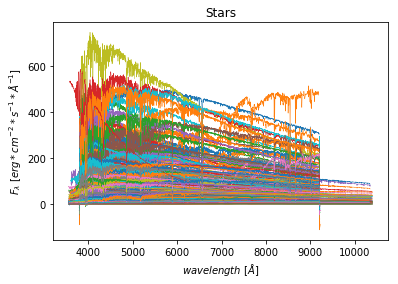

In [76]:
# plot stars
idx_stars = (y == 'STAR  ')
X_stars = X[idx_stars]
wavelength_stars = wavelength[idx_stars]

fig = plt.figure()
for i in range(len(X_stars)):
    # about 4 spectra above the 1k threshold
    if(max(X_stars[i])<1000):
        try:
            plt.plot(wavelength_stars[i],X_stars[i],linewidth=0.5)
        except:
            pass

#plt.xlim(min(wavelength_QSO),max(wavelength_QSO))
plt.xlabel(r'$wavelength$ '+r'$[\AA]$')
plt.ylabel(r'$F_\lambda$ '+r'$[erg*cm^{-2}*s^{-1}*\AA^{-1}]$')
plt.title('Stars')
plt.savefig('spec_plots/stars_model_BOSS.png')
plt.show()

In [69]:
for i in range(len(filenames)):
    df_current = load_obj(filenames[i])
    for i in range(7):
        print(df_current['information'].iloc[i])
    print('\n\n')

STAR  
CV                   
4.9392223e-05
9.0005124e-05
0
1237668271898361938
SDSS



GALAXY
                     
0.05606055
1.608591e-05
0
1237656906343317685
SDSS



GALAXY
                     
0.43029803
0.00010892747
0
1237655691943019350
BOSS



GALAXY
                     
0.57975125
0.00023359792
0
1237680075007394520
BOSS



STAR  
F3/F5V (30743)       
3.7806578e-05
6.478898e-06
0
1237663531339350151
BOSS



STAR  
G8V (101501)         
2.5210391e-05
3.3403267e-05
0
1237667108499948328
BOSS



STAR  
F5                   
0.00045107416
1.9679032e-05
0
1237674649929187556
SDSS



QSO   
                     
2.4044926
0.0011683783
0
1237658203427569967
BOSS



STAR  
F5                   
0.00021943996
7.380296e-06
0
1237648722305351685
SDSS



GALAXY
STARFORMING          
0.0795333
7.4937607e-06
0
1237658424099078253
SDSS



GALAXY
STARBURST            
0.032742385
6.4547553e-06
0
1237658608756523106
BOSS



GALAXY
STARFORMING          
0.126162
1.8590896e-05
0
123766136237

GALAXY
                     
0.0878459
2.5200938e-05
0
1237655499200987430
SDSS



GALAXY
                     
0.6683982
0.00015196415
0
1237663547982152164
BOSS



GALAXY
                     
0.3834757
0.00010887102
0
1237657628981526907
BOSS



QSO   
BROADLINE            
2.2240133
0.00091853656
0
1237679478542958898
BOSS



GALAXY
                     
0.48822063
0.00016034878
0
1237654879657722079
BOSS



GALAXY
                     
0.485988
0.00012174682
0
1237680242528616734
BOSS



QSO   
                     
2.449254
0.0014954768
0
1237665128542241241
BOSS



GALAXY
                     
0.17891428
1.6463011e-05
0
1237662198275375198
SDSS



GALAXY
BROADLINE            
0.07511507
1.4546535e-05
0
1237664854188097868
SDSS



STAR  
M5                   
-7.443524e-05
1.9669862e-05
0
1237661386530816305
SDSS



STAR  
F0IV (81937)         
-0.00085216755
8.627125e-06
0
1237655108911104030
BOSS



STAR  
K3V (32147)          
4.424855e-05
1.9944384e-05
0
1237662224604266661
B

STAR  
F2                   
0.00055126235
1.6059288e-05
0
1237667211590500507
SDSS



STAR  
WD                   
5.642653e-05
0.00013326648
0
1237648721237049363
SDSS



GALAXY
                     
0.54161364
0.00015848645
0
1237664878877737373
BOSS



GALAXY
                     
0.679503
0.00014061565
0
1237671141479482215
BOSS



STAR  
F2V (33256)          
-5.772003e-05
8.336495e-05
0
1237663918414627563
BOSS



GALAXY
                     
0.47561076
0.000117508964
0
1237657776606151640
BOSS



GALAXY
                     
0.1312313
4.7974518e-05
0
1237658609831706707
SDSS



GALAXY
                     
0.74887204
0.00029510245
0
1237678617959465862
BOSS



STAR  
F5                   
-0.00043096553
1.8203395e-05
0
1237652600647123141
SDSS



STAR  
F0IV (81937)         
-0.0011779249
1.1824633e-05
0
1237655369833185368
BOSS



STAR  
K5 (G_19-24)         
-1.901575e-05
7.4140553e-06
0
1237657628978053451
BOSS



GALAXY
                     
0.48181516
0.000111353846
0
1237

GALAXY
                     
0.10207966
2.0941257e-05
0
1237661386002464857
SDSS



GALAXY
                     
0.5045217
0.000112380156
0
1237679478015918560
BOSS



GALAXY
                     
0.60970736
0.00024081071
0
1237654879664144788
BOSS



GALAXY
                     
0.071319126
1.9921526e-05
0
1237664879419523090
SDSS



GALAXY
                     
0.08713694
2.3969911e-05
0
1237662663215022351
SDSS



GALAXY
                     
0.08833373
2.694584e-05
0
1237667781741838617
SDSS



GALAXY
                     
0.46952727
0.00018613388
0
1237662307812443441
BOSS



QSO   
BROADLINE            
1.5912555
0.000487616
0
1237658423013933243
SDSS



QSO   
BROADLINE            
0.40670744
6.882115e-05
0
1237671958594977841
SDSS



STAR  
A0                   
-0.000735389
3.2781747e-05
0
1237667914347708521
SDSS



GALAXY
                     
0.5013975
0.00013808577
0
1237651191356391849
BOSS



QSO   
                     
1.634205
0.0010347114
0
1237667429554454934
BOSS



GALAXY
STARBURST            
0.039996386
6.4259657e-06
0
1237665567155356120
SDSS



GALAXY
STARFORMING          
0.06079332
8.359955e-06
0
1237661087489786459
SDSS



GALAXY
                     
0.31366935
6.924363e-05
0
1237661811200557497
BOSS



GALAXY
                     
0.47840795
0.00013246367
0
1237661361306141357
BOSS



GALAXY
                     
0.45196888
0.00013893037
0
1237661850413499056
BOSS



GALAXY
                     
0.57755625
0.00017073074
0
1237653653447639637
BOSS



QSO   
                     
1.9402938
0.0015940644
0
1237651495221854590
BOSS



QSO   
BROADLINE            
4.393343
0.0006322995
0
1237658425173082908
BOSS



GALAXY
                     
0.7758521
0.00013297072
0
1237651251517457247
BOSS



GALAXY
                     
0.7059816
7.831445e-05
0
1237657589239185547
BOSS



GALAXY
                     
0.09648368
1.9600882e-05
0
1237658191608021377
SDSS



QSO   
                     
2.7386944
0.0015850408
0
1237666407920632179
BOSS



STA

STAR  
F5                   
-2.8237166e-05
4.217657e-05
0
1237656971300831285
SDSS



GALAXY
STARFORMING          
0.030055968
1.0073051e-05
0
1237657627919056974
SDSS



QSO   
BROADLINE            
1.4687026
0.0010797736
0
1237680242529009962
BOSS



GALAXY
                     
0.4792232
8.812226e-05
0
1237680503433331958
BOSS



GALAXY
                     
0.40293452
5.889289e-05
0
1237665102758543872
BOSS



QSO   
BROADLINE            
3.3793235
0.0005958873
0
1237663785282175538
BOSS



GALAXY
                     
0.1325595
2.4757763e-05
0
1237662301376086512
SDSS



QSO   
BROADLINE            
1.4685298
0.00095564924
0
1237658611443237078
BOSS



GALAXY
                     
0.44194624
9.4412826e-05
0
1237667966960534000
BOSS



GALAXY
                     
0.49112663
0.00022325692
0
1237665330937528718
BOSS



GALAXY
                     
0.579949
0.00026072332
0
1237653612109824161
BOSS



STAR  
M0                   
0.00020346316
3.8402526e-05
0
1237658298448216769
SDSS

QSO   
BROADLINE            
0.5390303
5.6314966e-05
0
1237655368758919303
BOSS



GALAXY
                     
0.43589693
0.00015594772
0
1237651272962408803
BOSS



QSO   
                     
4.662587
0.0025519107
0
1237657612333940898
BOSS



GALAXY
STARFORMING          
0.09017384
6.4985306e-06
0
1237657630597316713
SDSS



QSO   
BROADLINE            
1.3535283
0.0005293383
0
1237662195057295578
BOSS



GALAXY
                     
0.5219407
0.00019782863
0
1237654601555837802
BOSS



STAR  
K3V (32147)          
3.6345355e-05
6.658624e-06
0
1237678806923084097
BOSS



GALAXY
                     
0.7165956
0.0001449614
0
1237660963474768324
BOSS



QSO   
BROADLINE            
3.4135354
0.0004204712
0
1237672763909800498
BOSS



GALAXY
                     
0.6908221
0.0001887625
0
1237663530264429178
BOSS



STAR  
M0                   
-0.00039229527
1.2957893e-05
0
1237663784196243662
SDSS



GALAXY
                     
0.57387924
0.00012260738
0
1237659326017766023
BOSS




GALAXY
                     
0.54659444
0.00011891432
0
1237679438818312646
BOSS



GALAXY
                     
0.16760637
3.843799e-05
0
1237659325494067474
SDSS



GALAXY
                     
0.45433915
1.591679e-05
0
1237666273665548929
BOSS



GALAXY
                     
0.29616144
6.272566e-05
0
1237661850412187909
BOSS



GALAXY
                     
0.56312925
0.00015942751
0
1237665570904343566
BOSS



STAR  
F9                   
-0.00031575872
9.110073e-06
0
1237667255629512807
SDSS



GALAXY
                     
0.53754306
0.00015886419
0
1237664671641109204
BOSS



GALAXY
                     
0.6203491
0.00019568094
0
1237659132744958634
BOSS



GALAXY
                     
0.23536775
6.745002e-05
0
1237678880496091792
BOSS



GALAXY
                     
0.7505247
0.00017623117
0
1237658298457523129
BOSS



STAR  
F0IV (81937)         
-0.0007803083
3.4389544e-05
0
1237661850929463453
BOSS



QSO   
                     
1.1510326
0.0005814604
0
1237666246294962799
BO

GALAXY
STARFORMING          
0.05874126
1.5968777e-05
0
1237662307259449605
SDSS



QSO   
                     
1.3884755
0.0008825669
0
1237680247342171027
BOSS



GALAXY
                     
0.59200186
0.00025902054
0
1237660771809034953
BOSS



GALAXY
                     
0.2684335
3.7113386e-05
0
1237678907861565573
BOSS



GALAXY
STARFORMING          
0.100849375
1.0931121e-05
0
1237671991876518053
SDSS



GALAXY
                     
0.6103192
0.0002147349
0
1237667254008677286
BOSS



GALAXY
                     
0.9940701
4.0391387e-05
0
1237679321788318153
BOSS



GALAXY
                     
0.5220615
0.00010590579
0
1237651191356325932
BOSS



GALAXY
                     
0.17705126
3.2171283e-05
0
1237654880199049375
SDSS



GALAXY
                     
0.13136965
1.48085155e-05
0
1237662193460379755
SDSS



GALAXY
                     
0.3764499
8.043765e-05
0
1237658492269495120
BOSS



QSO   
BROADLINE            
1.549753
0.00077358703
0
1237659133279666643
BOSS



G

GALAXY
                     
0.3443083
0.000104775165
0
                   
SDSS



GALAXY
AGN                  
0.06652573
1.0652262e-05
0
1237661811195248755
SDSS



STAR  
A1m (78209)          
6.4144224e-05
0.00012888364
0
1237651754002350455
BOSS



GALAXY
                     
0.33425352
6.6596825e-05
0
1237667210527113389
BOSS



GALAXY
STARFORMING          
0.13330549
1.804453e-05
0
1237670964842529007
SDSS



GALAXY
                     
0.57192147
0.00020506981
0
1237660411037089880
BOSS



GALAXY
                     
0.50964934
0.0001935072
0
1237651190814278416
SDSS



GALAXY
                     
0.40821126
9.645332e-05
0
1237665329858806292
BOSS



QSO   
BROADLINE            
1.7615243
0.00060732226
0
1237657776080355657
BOSS



STAR  
M3III (44478)        
1.6358354e-05
3.4919907e-05
0
1237678791347601647
BOSS



GALAXY
                     
0.0696598
2.1196232e-05
0
1237649918427070537
SDSS



GALAXY
                     
0.52883977
0.00018196691
0
1237679321785827838

STAR  
F9                   
-6.248121e-05
7.194809e-06
0
1237669765477630046
SDSS



GALAXY
                     
0.5181954
0.00013532082
0
1237663785280143808
BOSS



GALAXY
STARFORMING          
0.13467722
9.9985955e-06
0
1237655369820733516
SDSS



QSO   
BROADLINE            
1.6768918
0.00016583357
0
1237680100235280500
BOSS



GALAXY
                     
0.6060312
0.00015671406
0
1237664673254802417
BOSS



GALAXY
                     
0.29187799
5.4681026e-05
0
1237680333788283324
BOSS



STAR  
F2III (89254)        
2.0972138e-05
6.0239185e-05
0
1237672795569520886
BOSS



GALAXY
                     
0.5694017
0.00012937006
0
1237655464309490215
BOSS



GALAXY
                     
0.50570434
0.00018826746
0
1237666434189492437
BOSS



GALAXY
                     
0.3168483
0.0002005697
0
1237680277945516360
BOSS



GALAXY
                     
0.6052999
0.0002920767
0
1237668271904392166
BOSS



GALAXY
                     
0.39240223
9.093394e-05
0
1237665372255289728
SDSS

GALAXY
                     
0.07091899
1.2555498e-05
0
1237657590856417405
SDSS



GALAXY
                     
0.37262994
7.7465884e-05
0
1237662526305665355
BOSS



GALAXY
STARFORMING          
0.15357547
1.2336381e-05
0
1237664292074029178
SDSS



GALAXY
                     
0.10573295
1.5370833e-05
0
1237667212138053847
SDSS



GALAXY
                     
0.31698835
4.9876955e-05
0
1237680245205041604
BOSS



GALAXY
                     
0.17716219
2.6111862e-05
0
1237662262713385208
SDSS



STAR  
F3/F5V (30743)       
-0.00037954806
7.2689945e-05
0
1237648705128038782
BOSS



STAR  
M4                   
-5.825183e-05
2.2158256e-05
0
1237658203431370849
SDSS



GALAXY
                     
0.060148865
1.6038784e-05
0
1237665569297859058
SDSS



GALAXY
                     
0.60098976
0.0002499742
0
1237658204516516261
BOSS



STAR  
K5Ve (118100)        
-0.00019731659
8.501251e-06
0
1237661433784762642
BOSS



GALAXY
                     
0.50760865
0.00017223491
0
1237654391

GALAXY
                     
0.5746399
0.00032490448
0
1237658303279727593
BOSS



GALAXY
                     
0.1864046
3.176837e-05
0
1237667211041243765
SDSS



STAR  
F9                   
-3.7386744e-05
1.677985e-05
0
                   
SDSS



QSO   
BROADLINE            
0.7287354
0.00023282622
0
1237657243509719293
BOSS



GALAXY
STARBURST            
0.21147698
3.528831e-05
0
1237658611445137787
BOSS



GALAXY
                     
0.6408228
0.00014726284
0
1237667733990998713
BOSS



STAR  
A1V (95418)          
0.00041951553
0.000117335694
0
1237667254003303019
BOSS



GALAXY
                     
0.3783267
5.144862e-05
0
1237661355932647968
BOSS



STAR  
A0                   
0.00013898996
4.8286372e-05
0
1237663782594084968
SDSS



GALAXY
                     
0.34464988
0.00012406275
0
1237652615667777675
SDSS



GALAXY
STARFORMING          
0.33916444
2.1304751e-05
0
1237665531181007601
BOSS



STAR  
G2                   
0.00020304766
1.6984579e-05
0
123766773450480

STAR  
A0                   
0.0006038923
5.9010035e-05
0
1237660670884970706
SDSS



GALAXY
STARBURST            
0.19782436
1.1411894e-05
0
1237667172394401972
SDSS



GALAXY
                     
0.682768
0.00020609416
0
1237663784214135516
BOSS



STAR  
K1IVa (142091)       
-0.00011334995
1.3327927e-05
0
1237662702398406821
BOSS



GALAXY
                     
0.52399564
0.00013433794
0
1237664837008032417
BOSS



GALAXY
STARFORMING          
0.17421795
5.6023015e-05
0
1237666185109897559
BOSS



GALAXY
                     
0.46785545
0.00022280641
0
1237667539081691657
BOSS



STAR  
A0                   
-0.00028429896
1.9598601e-05
0
1237667911144046639
SDSS



QSO   
BROADLINE            
1.9622265
0.00081976026
0
1237678617404834179
SDSS



GALAXY
                     
0.6395361
0.00019072491
0
1237667211595874965
BOSS



GALAXY
                     
0.5958052
0.00026289056
0
1237678879411667774
BOSS



STAR  
F3/F5V (30743)       
-8.96152e-05
1.7430435e-05
0
1237661813886

GALAXY
                     
0.31430054
7.114173e-05
0
1237662306722185487
SDSS



STAR  
G0 (G_101-29)        
0.00018772541
8.304205e-05
0
1237667293730832516
BOSS



STAR  
B8IV (171301)        
-0.00046278993
1.9688205e-05
0
1237652947990806617
BOSS



GALAXY
                     
0.15920371
2.55695e-05
0
1237674370216165686
SDSS



GALAXY
                     
0.54691195
0.00014120445
0
1237657241898844707
BOSS



STAR  
K5 (G_19-24)         
-6.6800267e-06
2.1017828e-05
0
1237655493299470450
BOSS



QSO   
BROADLINE            
2.4002132
0.00027212137
0
1237664668424471106
BOSS



GALAXY
                     
0.5739165
0.000103763574
0
1237659326018027835
BOSS



GALAXY
                     
0.42035028
9.122503e-05
0
1237665227312071192
BOSS



QSO   
BROADLINE            
1.7181648
0.00022463447
0
1237655107290202217
BOSS



GALAXY
STARBURST            
0.032390647
3.924391e-06
0
1237662302453826320
SDSS



GALAXY
AGN BROADLINE        
0.42022932
4.0119266e-05
0
1237667736650252

0.00011548579
0
1237661972799816118
BOSS



QSO   
BROADLINE            
1.5954852
0.0004700529
0
1237657628974973393
BOSS



STAR  
sdF3 (140283)        
0.0002470715
0.00012530372
0
1237665180061598327
BOSS



GALAXY
                     
0.23428623
3.3570435e-05
0
1237661434312196355
SDSS



STAR  
A0                   
0.0004053981
1.4266029e-05
0
1237662635829821516
SDSS



GALAXY
                     
0.58624876
0.00015299674
0
1237662685756391964
BOSS



GALAXY
                     
0.13693573
2.3061404e-05
0
1237655108906516607
SDSS



STAR  
M3III (44478)        
-0.00032438958
1.7592554e-05
0
1237666274201632873
BOSS



GALAXY
                     
0.3223046
4.5476576e-05
0
1237661069776978381
BOSS



STAR  
F9                   
-0.0002577659
7.3856313e-06
0
1237652629638545427
SDSS



GALAXY
                     
0.57488775
0.00020535321
0
1237679476932804846
BOSS



STAR  
F5                   
-0.0001244034
1.4070286e-05
0
1237657070625751178
SDSS



GALAXY
              

GALAXY
                     
0.10134224
1.7006636e-05
0
1237670956249972841
SDSS



STAR  
A0                   
9.0097536e-05
3.291316e-06
16
1237652936181743737
SDSS



QSO   
BROADLINE            
1.6253034
0.00068735535
0
1237679434522099932
BOSS



GALAXY
                     
0.5824614
0.00020264117
0
1237663915732173482
BOSS



GALAXY
                     
0.5887198
0.00018849698
0
1237654948912300807
BOSS



GALAXY
AGN                  
0.08386042
1.8621255e-05
0
1237668584356446318
SDSS



GALAXY
                     
0.47570965
0.00013436077
0
1237680298889773607
BOSS



GALAXY
STARFORMING          
0.10325756
1.2363676e-05
0
1237666300021440801
SDSS



GALAXY
                     
0.5628276
0.00018101471
0
1237654392180900587
BOSS



STAR  
M4                   
-1.0519117e-05
5.511422e-05
0
1237663278466793962
SDSS



GALAXY
                     
0.1516489
2.0137351e-05
0
1237652944786293019
SDSS



GALAXY
                     
0.44404212
7.161864e-05
0
1237667431175815746


STAR  
F5                   
-5.358244e-05
8.630103e-06
0
1237651274026188983
SDSS



GALAXY
                     
0.63220435
0.00016671764
0
1237671690689643503
BOSS



STAR  
K3                   
-3.7824208e-05
7.2626076e-06
0
1237657629516038286
SDSS



GALAXY
                     
0.60728204
0.00016070747
0
1237658802035557122
BOSS



QSO   
BROADLINE            
1.3019297
0.00027864176
0
1237679503237841268
BOSS



GALAXY
STARFORMING          
0.052529715
7.997412e-06
0
1237661069772718193
SDSS



GALAXY
                     
0.48244837
0.00011086829
0
1237665128006943030
BOSS



GALAXY
                     
0.8952649
6.882524e-05
0
1237663277926646183
BOSS



GALAXY
                     
0.28162438
5.9798916e-05
0
1237659119876506264
BOSS



STAR  
M2                   
1.2260639e-05
1.1338078e-05
0
1237668604218638458
SDSS



GALAXY
                     
0.45927164
0.00011553468
0
1237657611267015204
BOSS



GALAXY
                     
0.47248155
0.00012908896
0
12376614649211

GALAXY
                     
0.14771383
9.187674e-06
0
1237665565542645972
SDSS



GALAXY
                     
0.2364314
5.4450808e-05
0
1237663277929463927
SDSS



STAR  
K5                   
0.0002287575
1.2344026e-05
0
1237660344996332494
SDSS



GALAXY
                     
0.08741951
1.7128716e-05
0
1237665102222196756
SDSS



GALAXY
STARFORMING          
0.040009454
2.861521e-05
0
1237674651532263528
BOSS



QSO   
BROADLINE            
4.0927277
0.00032428006
0
1237662301365994244
SDSS



QSO   
BROADLINE            
2.0458417
0.00052305224
0
1237668298204119195
BOSS



GALAXY
                     
0.5403544
0.00014601245
0
1237680252171125385
BOSS



GALAXY
                     
0.7282918
0.00014762074
0
1237662224090399314
BOSS



GALAXY
                     
0.5684782
0.00014350213
0
1237661063871267891
BOSS



QSO   
BROADLINE            
1.3656569
0.0005825274
0
1237678617420693822
BOSS



GALAXY
                     
0.4689245
0.00016210068
0
1237657190909476996
BOSS





GALAXY
                     
0.28156906
5.5483426e-05
0
1237655502428046206
BOSS



STAR  
K7                   
0.00014495273
1.1182305e-05
0
1237660765904961935
SDSS



GALAXY
                     
0.32879293
7.575756e-05
0
1237662500015441172
BOSS



GALAXY
                     
0.21568821
3.525345e-05
0
1237680272039870813
BOSS



GALAXY
                     
0.48132947
0.00014682884
0
1237668504903615293
BOSS



GALAXY
                     
0.1522212
1.964867e-05
0
1237666209268040252
BOSS



GALAXY
                     
0.4275294
0.00011246765
0
1237660765908239014
SDSS



GALAXY
                     
0.38559148
0.00010230853
0
1237663308527894629
BOSS



GALAXY
                     
0.45446005
9.012465e-05
0
1237662620262663184
BOSS



STAR  
A2II (39866)         
-0.00042308803
1.6167929e-05
0
1237665569291370687
BOSS



GALAXY
                     
0.5821347
0.00015456398
0
1237665548897878906
BOSS



STAR  
F9                   
-0.00021761982
1.5796297e-05
0
1237655108904485

GALAXY
                     
0.3638438
9.256308e-05
0
1237673706654925419
BOSS



GALAXY
                     
0.10436976
2.2155864e-05
0
1237679503776350525
BOSS



GALAXY
                     
0.14918989
5.3940632e-05
0
1237661353242788270
BOSS



QSO   
BROADLINE            
0.5993643
0.00028524973
0
1237678437016207591
SDSS



GALAXY
                     
0.27478316
4.1958963e-05
0
1237662237481632020
SDSS



GALAXY
                     
0.31836295
5.818841e-05
0
1237679435591319726
BOSS



QSO   
                     
2.1595857
0.0010154565
0
1237667323254735103
BOSS



GALAXY
                     
0.30074143
6.570917e-05
0
1237662246595854561
BOSS



GALAXY
                     
-0.0004859991
3.9819977e-05
0
1237680332719522039
BOSS



GALAXY
                     
0.424015
0.00014044183
0
1237665126950896045
BOSS



QSO   
BROADLINE            
2.1570013
0.00048534904
0
1237664880490709218
BOSS



GALAXY
                     
0.55449075
0.00018973698
0
1237666245766218568
BOSS




QSO   
BROADLINE            
1.2208506
0.00056768354
0
1237654606389772615
SDSS



STAR  
M5                   
-5.7317226e-05
2.7532918e-05
0
1237664667368816781
SDSS



GALAXY
                     
0.25238168
3.6048754e-05
0
1237660024520769753
SDSS



STAR  
WDhotter             
-0.00019414915
6.384375e-05
0
1237664834851373288
BOSS



GALAXY
                     
0.5426108
0.00012353886
0
1237662224092824871
BOSS



GALAXY
                     
0.21717526
4.6867724e-05
0
1237659131133755554
SDSS



GALAXY
                     
0.47509855
8.329449e-05
0
1237668737361707957
BOSS



GALAXY
STARBURST            
0.113212176
7.740169e-06
0
1237663783139344685
SDSS



STAR  
G0 (63791)           
8.256128e-05
1.5035617e-05
0
1237666302164795471
BOSS



QSO   
BROADLINE            
1.7770846
0.0004703765
0
1237679461903303092
BOSS



GALAXY
                     
0.5700092
0.00018095854
0
1237668624621765195
BOSS



GALAXY
                     
0.13547681
3.1071137e-05
0
12376517379044804

GALAXY
STARFORMING          
0.074585535
9.7428065e-06
0
1237659161739198767
SDSS



GALAXY
                     
0.5510078
9.1088215e-05
0
1237665101673922954
BOSS



QSO   
BROADLINE            
2.213955
0.00034892122
0
1237654601034432623
BOSS



STAR  
A0                   
-0.00035184942
7.034391e-05
0
1237670961624973744
SDSS



GALAXY
                     
0.3508
9.563556e-05
0
1237661464919541111
BOSS



QSO   
BROADLINE            
0.7561617
9.24291e-05
0
1237661086952260636
BOSS



GALAXY
                     
0.59828305
0.0002176421
0
1237660562430231356
BOSS



GALAXY
                     
0.5353995
0.0001684116
0
1237664336642638251
BOSS



GALAXY
                     
0.268153
4.2842737e-05
0
1237667782275891629
BOSS



GALAXY
                     
0.3501955
7.181006e-05
0
1237663784212824730
SDSS



STAR  
K5 (G_19-24)         
-0.00032091085
1.6978951e-05
0
1237658203441791117
BOSS



QSO   
BROADLINE            
2.1579466
0.0006986635
0
1237661150846124271
BOSS



GALA

GALAXY
                     
0.56806517
0.00024649734
0
1237655468600983846
BOSS



STAR  
M6                   
-1.2897329e-05
2.993225e-05
0
1237652943162901182
SDSS



GALAXY
STARFORMING          
0.111944936
6.7684177e-06
0
1237652900763205746
SDSS



STAR  
F2V (33256)          
0.00018950031
8.97962e-05
0
1237657591386473025
BOSS



GALAXY
                     
0.7753834
0.00015647509
0
1237658424619631057
BOSS



STAR  
K5Ve (118100)        
0.00046094815
1.6633925e-05
0
1237666409554052035
BOSS



STAR  
M8                   
-0.00013511241
3.1778774e-05
0
1237662620262662551
SDSS



GALAXY
STARFORMING          
0.02908881
7.3026886e-06
0
1237658801505501410
SDSS



GALAXY
                     
0.43939433
0.00016133099
0
1237668623556411903
BOSS



GALAXY
                     
0.7446734
0.00012752031
0
1237680302101627697
BOSS



GALAXY
                     
0.5733097
0.00023510588
0
1237659326560862701
BOSS



GALAXY
                     
0.15412475
4.200449e-05
0
123766428563

GALAXY
                     
0.12202645
2.1207497e-05
0
1237657606420169079
SDSS



GALAXY
                     
0.6475696
0.00018686702
0
1237668289082622759
BOSS



GALAXY
STARFORMING          
0.10420708
1.350636e-05
0
1237671767468015840
SDSS



GALAXY
                     
0.56150246
0.00013457991
0
1237662225154900228
BOSS



GALAXY
STARBURST            
0.030095516
1.36938515e-05
0
1237665582716748018
BOSS



GALAXY
                     
0.6006489
0.0001761798
0
1237662263772971739
BOSS



GALAXY
                     
0.08752527
1.8679528e-05
0
1237680503438115268
BOSS



GALAXY
                     
0.5603528
0.00010460755
0
1237658493892232023
BOSS



GALAXY
                     
0.3730023
7.214216e-05
0
1237651539255820970
BOSS



QSO   
BROADLINE            
2.0554185
0.00033184918
0
1237679456539443478
BOSS



GALAXY
                     
0.51314473
0.00014258709
0
1237655464841839213
BOSS



QSO   
                     
1.3265599
0.00040248435
0
1237655107834478889
BOSS




GALAXY
                     
0.5762543
0.00020660713
0
1237654653098001101
BOSS



GALAXY
                     
0.23906554
5.6062836e-05
0
1237665024368509099
BOSS



GALAXY
                     
0.332943
0.00011360098
0
1237679437742932404
BOSS



GALAXY
                     
0.654145
0.00026815466
0
1237651753996518057
BOSS



GALAXY
                     
0.22795102
4.8920934e-05
0
1237660637074489526
SDSS



QSO   
BROADLINE            
2.2905378
0.00057464006
0
1237664289932247269
BOSS



GALAXY
                     
0.51189655
0.00010072088
0
1237658491204927912
BOSS



GALAXY
                     
0.33076227
0.00021893647
0
1237662246594937107
BOSS



GALAXY
                     
0.14790446
3.8880353e-05
0
1237662663759823360
SDSS



GALAXY
                     
0.41512403
0.0001224981
0
1237678541161562916
BOSS



STAR  
G2                   
-6.6767585e-05
9.037388e-06
0
1237663782593560677
SDSS



GALAXY
                     
0.7423958
0.00019843568
0
1237651250408981363
BOSS


                     
0.62675345
0.00015685086
0
1237674650458980520
BOSS



QSO   
BROADLINE            
2.734753
0.0003825777
0
1237674367530107215
BOSS



GALAXY
                     
0.47755066
0.00012168678
0
1237661871868149985
BOSS



GALAXY
                     
0.59968734
0.00014672652
0
1237662698106258058
BOSS



QSO   
BROADLINE            
0.46696553
2.8031933e-05
0
1237661069772915217
SDSS



GALAXY
                     
0.41487658
7.411538e-05
0
1237678859017847105
BOSS



QSO   
BROADLINE            
1.1215314
0.0004882331
0
1237655108913463445
BOSS



GALAXY
                     
0.69522905
0.00020224802
0
1237654609606279978
BOSS



QSO   
BROADLINE            
2.1840966
0.00039352087
0
1237664290998845750
BOSS



GALAXY
                     
0.10605977
2.977019e-05
0
1237648722303778927
SDSS



STAR  
A0                   
8.460159e-05
8.681299e-05
0
1237660413725114615
SDSS



GALAXY
STARBURST            
0.5343624
1.9364677e-05
0
1237678600228635247
BOSS



GALAXY


GALAXY
                     
0.3183896
5.1065068e-05
0
1237661923405267500
BOSS



GALAXY
                     
0.06525327
4.8317983e-05
0
1237662307798483079
SDSS



GALAXY
                     
0.575796
0.00018269701
0
1237667550877188843
BOSS



GALAXY
                     
0.10203501
2.1874837e-05
0
1237665531179041001
SDSS



GALAXY
                     
0.56272316
0.00013958832
0
1237665127997702800
BOSS



GALAXY
STARFORMING          
0.07655678
7.0321726e-06
0
1237648721762779336
SDSS



STAR  
M3                   
-2.1310509e-05
2.1273632e-05
0
1237661138495668362
SDSS



GALAXY
                     
0.3717873
0.00012739697
0
1237664836996760921
BOSS



GALAXY
                     
0.09481455
1.6327012e-05
0
1237678920197603488
BOSS



GALAXY
                     
0.65185934
0.00025151455
0
1237657590850060999
BOSS



GALAXY
                     
0.5344843
0.00027132378
0
1237654653638214521
BOSS



STAR  
G2                   
0.000526744
2.4356332e-05
0
1237662268080259477


GALAXY
                     
0.6082295
0.0002513339
0
1237678621699146484
BOSS



GALAXY
STARBURST            
0.094630644
7.6137994e-06
0
1237667730736873745
SDSS



STAR  
M4                   
0.00013724627
8.804883e-05
0
1237664088609129899
SDSS



QSO   
BROADLINE            
0.9625073
0.00019736297
0
1237659132744368240
BOSS



GALAXY
                     
0.4822373
7.666178e-05
0
1237664852029997640
BOSS



GALAXY
                     
0.14676747
7.84888e-06
0
1237678596463002406
SDSS



QSO   
BROADLINE            
2.3600929
0.00025338025
0
1237651272436613304
BOSS



GALAXY
STARFORMING          
0.04368451
1.3213736e-05
0
1237656242778996758
SDSS



GALAXY
STARFORMING          
0.026565405
6.7552214e-06
0
1237662264862900550
SDSS



GALAXY
STARFORMING          
0.017463977
1.7527034e-05
0
1237650796217172272
SDSS



GALAXY
STARFORMING          
0.033493385
1.1933966e-05
0
1237662199889330242
SDSS



GALAXY
                     
0.456708
0.00011303945
0
1237679504859398650
BOSS

GALAXY
                     
0.7515232
0.00019249394
0
1237679322860945727
BOSS



STAR  
M1 (204445)          
-0.00032927858
1.4699198e-05
0
1237651251488686253
BOSS



QSO   
BROADLINE            
2.148796
0.00063275534
0
1237657590850715861
BOSS



QSO   
                     
0.9650216
0.00053224136
0
1237661434849001934
BOSS



QSO   
                     
2.3682904
0.0006390861
0
1237654610142888177
BOSS



GALAXY
                     
0.28137854
0.00016039774
0
1237679478017491470
BOSS



STAR  
F9                   
-0.00015593081
2.308169e-05
0
1237667255071080733
SDSS



GALAXY
                     
0.067301944
1.7819402e-05
0
1237654950524420240
SDSS



QSO   
BROADLINE            
1.6343513
0.00046782618
0
1237663530258661684
SDSS



GALAXY
                     
0.55969787
0.0002248939
0
1237679478553969140
BOSS



QSO   
                     
2.2578552
0.00084336527
0
1237678620098560579
BOSS



GALAXY
                     
0.19967793
3.692705e-05
0
1237672796107440270
BO

STAR  
K1                   
-5.6710705e-05
8.107847e-06
0
1237658492269559926
SDSS



GALAXY
                     
0.34275827
5.4711167e-05
0
1237667911122878604
BOSS



GALAXY
                     
0.59162736
0.00039439343
0
1237662193450877579
BOSS



QSO   
BROADLINE            
0.8017494
5.4211196e-05
0
1237658611981550133
BOSS



QSO   
BROADLINE            
2.1932592
0.00083189685
0
1237668494170849493
BOSS



GALAXY
                     
0.19611624
3.1026288e-05
0
1237665566083908002
SDSS



GALAXY
                     
0.38799578
8.297397e-05
0
1237662637983466644
BOSS



GALAXY
                     
0.7202902
0.00043615454
0
1237661966357496393
BOSS



GALAXY
                     
0.44675034
9.125357e-05
0
1237667541216330321
BOSS



STAR  
M7                   
-1.2955177e-05
5.552069e-05
0
1237659897249007022
SDSS



GALAXY
                     
0.19486013
4.6209338e-05
0
1237661069794345245
BOSS



STAR  
M3                   
0.00010135476
1.5087633e-05
0
1237656568120148

STAR  
F9                   
-0.00023996207
7.4261943e-06
0
1237655107837624341
SDSS



STAR  
K1                   
-0.00022118833
8.605693e-06
0
1237660241384964378
SDSS



STAR  
G0 (63791)           
-0.00037724467
1.2363112e-05
0
1237666245763006574
BOSS



GALAXY
                     
0.5212525
0.00019268626
0
1237660765912301582
BOSS



GALAXY
                     
0.20820795
4.5204197e-05
0
1237670449448747317
SDSS



GALAXY
                     
0.0912161
2.6172514e-05
0
1237650762931175541
SDSS



QSO   
BROADLINE            
2.2172525
0.0004222095
0
1237667485383721217
BOSS



GALAXY
                     
0.12779582
2.5727588e-05
0
1237665023834849396
SDSS



GALAXY
                     
0.06895837
2.6171367e-05
0
1237660614512935047
SDSS



GALAXY
                     
0.4855924
0.00042532742
0
1237665102209220978
BOSS



STAR  
F9                   
-3.4484117e-05
7.679788e-06
0
1237656242237538376
SDSS



QSO   
BROADLINE            
1.930657
0.001006615
0
123765777661375

QSO   
BROADLINE            
1.5522246
0.00036606033
0
1237670957323714710
SDSS



GALAXY
                     
0.6276765
0.00015484005
0
1237680327878313386
BOSS



GALAXY
                     
0.4922508
0.00023857717
0
1237661873493705614
BOSS



GALAXY
                     
0.5861322
0.00018444356
0
1237665531719712915
BOSS



GALAXY
                     
0.1435672
2.04388e-05
0
1237659161744572839
BOSS



STAR  
M4                   
-0.00028488197
3.1014555e-05
0
1237662302453236408
SDSS



STAR  
WD                   
0.00017985393
0.000120438905
0
1237665097918382372
SDSS



QSO   
BROADLINE            
0.7617999
8.248994e-05
0
1237665373869441392
BOSS



GALAXY
STARBURST            
0.037778553
7.5536195e-06
0
1237654383588409508
SDSS



STAR  
F3/F5V (30743)       
-0.0009416258
1.6656264e-05
0
1237651539261128943
BOSS



QSO   
BROADLINE            
2.376451
0.001027559
0
1237661950264017246
BOSS



GALAXY
                     
0.47329015
3.0874675e-05
0
1237657769630171739
B

0.42007217
4.8684e-05
0
1237665129606217969
BOSS



GALAXY
                     
0.42136288
0.00010551904
0
1237678825175646740
BOSS



QSO   
BROADLINE            
1.460121
0.0008235748
0
1237663782591070567
BOSS



STAR  
A0                   
0.00013043746
7.4490013e-06
0
1237646382079541699
SDSS



GALAXY
                     
0.49285012
0.00010342727
0
1237664819280675418
BOSS



GALAXY
                     
0.57406205
0.00014418813
0
1237648722815811867
BOSS



GALAXY
STARBURST            
0.06497593
5.49339e-06
0
1237662225682006095
SDSS



GALAXY
                     
0.5325671
0.0002873243
0
1237658802035360594
BOSS



GALAXY
STARFORMING          
0.050124664
8.065291e-06
0
1237655370361667692
SDSS



QSO   
BROADLINE            
1.6342994
0.0005545683
0
1237664290472526080
BOSS



GALAXY
                     
0.67414206
0.0001877662
0
1237658304890208960
BOSS



GALAXY
                     
0.3307566
0.00013151736
0
1237678622239425113
BOSS



STAR  
F5                   
0.0

GALAXY
STARFORMING          
0.08838623
1.4011663e-05
0
1237648721792139550
SDSS



STAR  
F0III (89025)        
-0.00040908303
1.191591e-05
0
1237659133817520223
BOSS



STAR  
F5                   
0.00024173479
9.1411275e-06
0
1237673843007620161
SDSS



STAR  
F9                   
7.285774e-05
8.119149e-06
0
1237680240912236644
SDSS



STAR  
K5Ve (118100)        
-4.9139326e-05
6.976929e-06
0
1237679035089158321
BOSS



STAR  
M9                   
-6.0870756e-05
6.0000817e-05
0
1237654399154193094
SDSS



GALAXY
STARFORMING          
0.1270055
1.0542785e-05
0
1237648720171958435
SDSS



GALAXY
                     
0.5207599
0.0001390305
0
1237648720695132551
BOSS



GALAXY
                     
0.53128463
0.00014530592
0
1237661971190972815
BOSS



GALAXY
STARFORMING          
0.12352939
8.954781e-06
0
1237667536402972788
SDSS



GALAXY
STARFORMING          
0.1272391
8.912189e-06
0
1237678437019222262
SDSS



STAR  
F3/F5V (30743)       
-0.00042231966
1.01676e-05
0
1237664295

GALAXY
                     
0.4749979
8.7913664e-05
0
1237661384387527071
BOSS



STAR  
M4.5:III (123657)    
-0.0005148199
0.00016394252
0
1237668503295623812
BOSS



GALAXY
                     
0.51112354
0.000105001636
0
1237662530069201599
BOSS



STAR  
M4.5:III (123657)    
0.00012701687
0.00013938252
0
1237678621693968907
BOSS



QSO   
BROADLINE            
2.8629918
0.00025756378
0
1237663234453536948
BOSS



GALAXY
STARFORMING          
0.08638504
1.8261315e-05
0
1237658492816326735
SDSS



STAR  
K1                   
-0.00062902685
2.7597505e-05
0
1237679035089092936
SDSS



QSO   
BROADLINE            
0.5536645
6.0012582e-05
0
1237662223545008276
BOSS



GALAXY
                     
0.65138745
0.00016429991
0
1237653653450719763
BOSS



QSO   
                     
1.2243279
0.0013915354
0
1237648722820006679
BOSS



GALAXY
BROADLINE            
0.38588658
3.851413e-05
0
1237667292120744049
BOSS



GALAXY
                     
0.47694018
0.000101038364
0
12376507956780

QSO   
BROADLINE            
2.3058953
0.0007372349
0
1237665226233413905
BOSS



GALAXY
                     
0.082376316
2.7263804e-05
0
1237671124292665669
SDSS



STAR  
F5                   
8.629877e-05
1.9406772e-05
0
1237652900758749229
SDSS



GALAXY
                     
0.6340673
0.00020890262
0
1237663546898449269
BOSS



QSO   
BROADLINE            
2.3806055
0.00024702057
0
1237662266994000168
BOSS



GALAXY
STARFORMING          
0.051103264
1.4499643e-05
0
1237657589785624732
SDSS



GALAXY
                     
0.49630678
0.00018829531
0
1237669519046279893
BOSS



GALAXY
                     
0.51808023
0.00012973623
0
1237657190368346514
BOSS



GALAXY
                     
0.38886967
6.049031e-05
0
1237665329855791500
BOSS



GALAXY
STARFORMING          
0.023615925
1.095366e-05
0
1237655124465418421
SDSS



GALAXY
                     
0.6868876
0.00014706167
0
1237664852576698623
BOSS



GALAXY
                     
0.4222101
0.00015005504
0
1237664818754421419
BOS

STAR  
F5                   
-0.000118092845
1.0123166e-05
0
1237668293911248908
SDSS



STAR  
K0V (10780)          
0.00014735047
8.005634e-06
0
1237648721751310573
BOSS



GALAXY
                     
0.6599234
0.0001723714
0
1237678597022483120
BOSS



GALAXY
STARFORMING          
0.029868124
1.0371722e-05
0
1237657608571191645
SDSS



GALAXY
                     
0.114135094
2.432322e-05
0
1237661416596045916
SDSS



STAR  
K1                   
-3.928557e-05
6.4601645e-06
0
1237657630041505961
SDSS



STAR  
F5                   
0.00015484654
1.5814694e-05
0
1237661950253400269
SDSS



GALAXY
                     
0.5187481
0.00014951218
0
1237672837446303810
BOSS



STAR  
M0                   
-8.193402e-05
4.859146e-05
0
1237661464914624863
SDSS



STAR  
F9                   
0.0002973335
2.0263098e-05
0
1237652933493522820
SDSS



GALAXY
                     
0.4347624
0.00011933203
0
1237665128017101638
BOSS



GALAXY
STARFORMING          
0.039522193
6.336367e-06
0
123766

STAR  
F9                   
-7.0726705e-06
7.928909e-06
0
1237657071696805974
SDSS



GALAXY
                     
0.55861133
0.00012137332
0
1237651753989112321
BOSS



QSO   
BROADLINE            
4.0195966
0.0008541313
0
1237661968498164225
BOSS



GALAXY
                     
0.16645807
3.0249052e-05
0
1237668294984138792
SDSS



GALAXY
                     
0.40127376
9.763379e-05
0
1237668625162305665
BOSS



STAR  
A9V (154660)         
8.494487e-06
0.00011380336
0
1237680272574448531
BOSS



GALAXY
STARFORMING          
0.10853754
7.4721884e-06
0
1237671766926229684
SDSS



GALAXY
                     
0.09662416
2.3162707e-05
0
1237662225146380349
SDSS



STAR  
K3                   
-0.00022598951
1.2603925e-05
0
1237666433116668346
SDSS



GALAXY
                     
0.4254003
0.00014775243
0
1237660956495774281
BOSS



GALAXY
STARBURST            
0.20425518
9.046495e-06
0
1237658609831313536
SDSS



GALAXY
                     
0.5662731
0.00025603184
0
12376576064273785

GALAXY
                     
0.6682241
9.182093
0
1237678437014831590
SDSS



GALAXY
STARBURST            
0.05757317
7.681292e-06
0
1237663783676149890
SDSS



GALAXY
STARFORMING          
0.25485787
3.0475994e-05
0
1237663918411219237
SDSS



GALAXY
                     
0.5653228
0.00021822857
0
1237660412115747426
BOSS



QSO   
                     
1.9806024
0.00078641594
0
1237661967430516896
BOSS



GALAXY
                     
0.06605731
1.2549173e-05
0
1237671124834058363
SDSS



GALAXY
STARBURST            
0.07684502
4.785375e-06
0
1237663783680999563
SDSS



GALAXY
                     
0.5214356
0.00012416496
0
1237664338253119902
BOSS



GALAXY
                     
0.45259666
0.000108966466
0
1237667324328411602
SDSS



STAR  
A1V (95418)          
-0.00016475827
0.00013746938
0
1237648705659732285
BOSS



QSO   
BROADLINE            
0.3673428
4.7582984e-05
0
1237662193455202326
SDSS



GALAXY
                     
0.61693543
0.00018802531
0
1237668624625632188
BOSS




UnpicklingError: pickle data was truncated

In [ ]:
list(range(6))

In [ ]:
x = np.zeros((5,7))


In [ ]:
x[1] = [1,2,3,4,0,0,0]